# Some First-Pass Plots
##### Zoheyr Doctor, 07/14/15

Import functions and settings:

In [2]:
import numpy as np
from glob import glob

import des_utils
import des_io

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

Grab the data from the text files and create necessary selectors.  Loop over the simulation files and the data files.  To qualify as a potential trigger observation (PTO), an observation must satisfy:
##### 1) 30.5 < zp < 34.0
#####2) -.5 < zp_fwhm_upper < 2.0
#####3) photprob > 5
#####4) photflag > 1 (ie. it's 4096)
To get a full-blown trigger, i and z PTOs must satisfy:
#####1) i and z PTO must be on the same night for shallow fields.  For deep fields allow the PTOs to be separated by max 1 night.
#####2) For simulated data, at least one of the two PTOs must have an SNR > 5 

des_utils.py:267: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
des_utils.py:289: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if SNRsel1 == None:
/Users/Zoheyr/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: RuntimeWarning: invalid value encountered in log


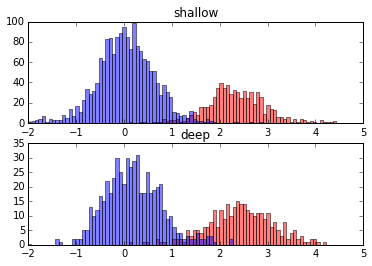

In [3]:
filetypes = ['sim','data']
fieldtypes = ['shallow','deep']
dict1 = dict()
for filetype in filetypes:
    if filetype == 'sim':
        files = glob("../ZD_KNDES_TEST/*DAT")
    elif filetype == 'data':
        files = glob("../DESY1_numepoch1_iz_real_text/*.dat")
    thelist,theheaders = des_utils.get_all_obs(files)
    shallow_list,deep_list = des_utils.get_depth_lists(thelist)
    for dnum,depth_list in enumerate([shallow_list,deep_list]):
        zbandinfo = des_utils.get_band_info(depth_list,'z')
        ibandinfo = des_utils.get_band_info(depth_list,'i')
        if filetype == 'sim':
            zSNR_sel = des_utils.get_SNR_selector(zbandinfo)
            iSNR_sel = des_utils.get_SNR_selector(ibandinfo)
            if fieldtypes[dnum] == 'shallow':
                zsellist,isellist,cnites = des_utils.common_trignite_selector(zbandinfo,ibandinfo,zSNR_sel,iSNR_sel,1,0,1)
            elif fieldtypes[dnum] == 'deep':
                zsellist,isellist,cnites = des_utils.common_trignite_selector(zbandinfo,ibandinfo,zSNR_sel,iSNR_sel,1,1,1)
        elif filetype =='data':
            if fieldtypes[dnum] == 'shallow':
                zsellist,isellist,cnites = des_utils.common_trignite_selector(zbandinfo,ibandinfo,None,None,1,0,0)
            elif fieldtypes[dnum] == 'deep':
                zsellist,isellist,cnites = des_utils.common_trignite_selector(zbandinfo,ibandinfo,None,None,1,1,0)
        detection_flags_list = des_utils.get_detection_flags_list(cnites,zbandinfo,ibandinfo)
        colors = []
        for i in range(0,len(zbandinfo)):
            if np.any(zsellist[i]):
                imag = -2.5*np.log(ibandinfo[i][2][isellist[i]][0])
                zmag = -2.5*np.log(zbandinfo[i][2][zsellist[i]][0])
                colors.append(imag-zmag)
        if filetype == 'sim':
            if dnum == 0:
                plt.subplot(211)
                plt.hist(colors,range=(-2,5),bins=100,alpha=0.5,color='r');
                plt.title('shallow')
            elif dnum == 1:
                plt.subplot(212) 
                plt.hist(colors,range=(-2,5),bins=100,alpha=0.5,color='r');
                plt.title('deep')
        if filetype =='data':
            if dnum == 0:
                plt.subplot(211)
                plt.hist(colors,range=(-2,5),bins=100,alpha=0.5);
            elif dnum == 1:
                plt.subplot(212)
                plt.hist(colors,range=(-2,5),bins=100,alpha=0.5);


In [7]:
colors==colors.dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [6]:
plt.hist(colors.dropna())

AttributeError: 'list' object has no attribute 'dropna'